In [1]:
import numpy as np
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import sys

import argparse, os, math, pickle, json

# 1) Load your model
from dual_alm_rnn_models import *
from dual_alm_rnn_models import TwoHemiRNNTanh_asymmetric_single_readout
from dual_alm_rnn_exp import DualALMRNNExp
plt.rcParams['pdf.fonttype'] = '42' 


## Small RNN cross hemi analysis

In [51]:
# 0.2 L, 1 R
lefthemi_learning_rightdom = np.load('test/figs/crosshemi/epoch_0/left_asymm_0.2_right_asymm_1.0/all_learning_epoch.npy')
righthemi_learning_rightdom = np.load('test/figs/lr/all_learning_right_L0.2_R1.npy')

# 1 L, 0.2 R
lefthemi_learning_leftdom = np.load('test/figs/lr/all_learning_left_L1_R0.2.npy')
righthemi_learning_leftdom = np.load('test/figs/lr/all_learning_right_L1_R0.2.npy')


# 0.2 L, 1 R
learning_epoch0 = np.load('test/figs/crosshemi/epoch_0/left_asymm_0.2_right_asymm_1.0/all_learning_epoch.npy')
learning_epoch10 = np.load('test/figs/crosshemi/epoch_10/left_asymm_0.2_right_asymm_1.0/all_learning_epoch.npy')
learning_epoch20 = np.load('test/figs/crosshemi/epoch_20/left_asymm_0.2_right_asymm_1.0/all_learning_epoch.npy')
learning_epoch40 = np.load('test/figs/crosshemi/epoch_40/left_asymm_0.2_right_asymm_1.0/all_learning_epoch.npy')

# # symmetric
# learning_epoch0 = np.load('test/figs/crosshemi/symmetric/epoch_0/all_learning_epoch.npy')
# learning_epoch10 = np.load('test/figs/crosshemi/symmetric/epoch_10/all_learning_epoch.npy')
# learning_epoch20 = np.load('test/figs/crosshemi/symmetric/epoch_20/all_learning_epoch.npy')
# learning_epoch40 = np.load('test/figs/crosshemi/symmetric/epoch_40/all_learning_epoch.npy')

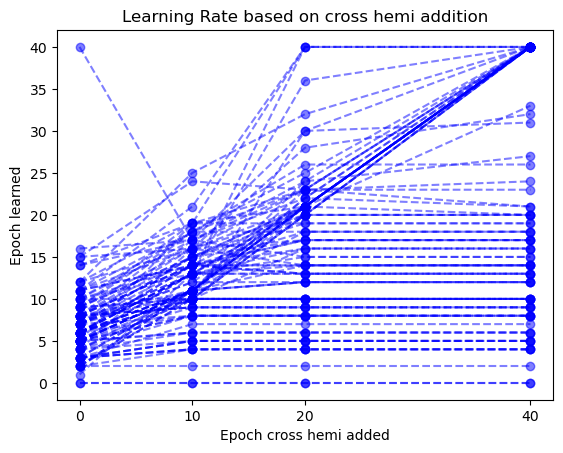

In [52]:
# how much does learning speed up with cross hemi?
for i in range(100):
    plt.plot([0,1,2,4],[learning_epoch0[i], learning_epoch10[i], learning_epoch20[i], learning_epoch40[i]], ls='--', marker='o',color='b',alpha=0.5)

plt.xticks([0, 1, 2, 4], ['0', '10', '20', '40'])
plt.xlabel('Epoch cross hemi added')
plt.ylabel('Epoch learned')
plt.title('Learning Rate based on cross hemi addition')
plt.show()



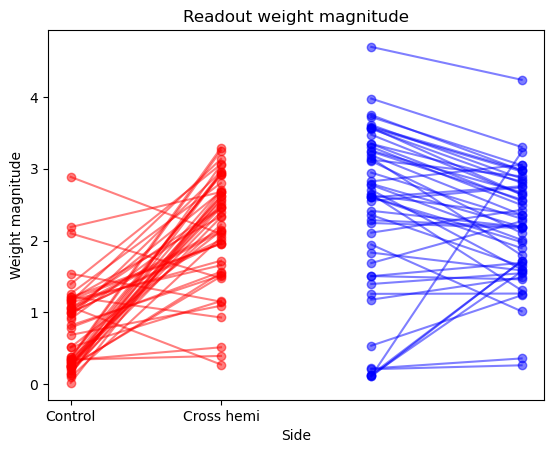

In [69]:
# readout weight imbalance washout

# 0.2 L, 1 R
readout_crosshemi = np.load('test/figs/crosshemi/epoch_0/left_asymm_0.2_right_asymm_1/all_readout_weights.npy')

readout_ctl = np.load('test/figs/crosshemi/epoch_40/left_asymm_0.2_right_asymm_1/all_readout_weights.npy')


for i in range(50):

    plt.plot([0,1],[np.sum(np.abs(readout_ctl[i,0,:2])), np.sum(np.abs(readout_crosshemi[i,0,:2]))], marker='o', color='red', alpha=0.5)
    plt.plot([2,3],[np.sum(np.abs(readout_ctl[i,0,2:])), np.sum(np.abs(readout_crosshemi[i,0,2:]))], marker='o', color='blue', alpha=0.5)


plt.xticks([0, 1], ['Control', 'Cross hemi'])
plt.xlabel('Side')
plt.ylabel('Weight magnitude')
plt.title('Readout weight magnitude')
plt.show()
    






In [ ]:
# Matching learning epoch with addition of cross hemi

epoch_40_lr_left = np.load('test/figs/crosshemi/epoch_40/left_asymm_1_right_asymm_1/all_learning_epoch_l.npy')
epoch_40_lr_right = np.load('test/figs/crosshemi/epoch_40/left_asymm_1_right_asymm_1/all_learning_epoch_r.npy')

epoch_20_lr_left = np.load('test/figs/crosshemi/epoch_20/left_asymm_1_right_asymm_1/all_learning_epoch_l.npy')
epoch_20_lr_right = np.load('test/figs/crosshemi/epoch_20/left_asymm_1_right_asymm_1/all_learning_epoch_r.npy')

epoch_0_lr_left = np.load('test/figs/crosshemi/epoch_0/left_asymm_1_right_asymm_1/all_learning_epoch_l.npy')
epoch_0_lr_right = np.load('test/figs/crosshemi/epoch_0/left_asymm_1_right_asymm_1/all_learning_epoch_r.npy')

epoch_10_lr_left = np.load('test/figs/crosshemi/epoch_10/left_asymm_1_right_asymm_1/all_learning_epoch_l.npy')
epoch_10_lr_right = np.load('test/figs/crosshemi/epoch_10/left_asymm_1_right_asymm_1/all_learning_epoch_r.npy')

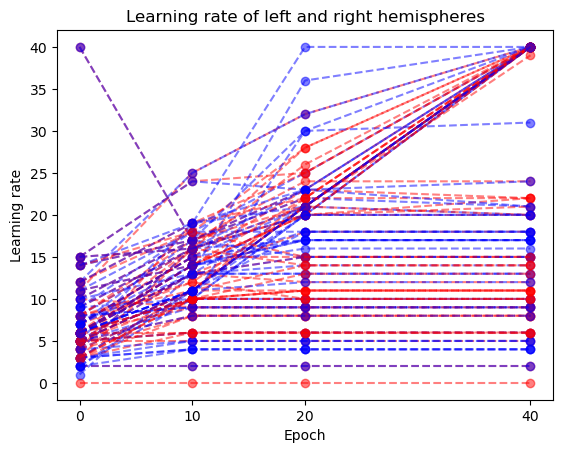

In [ ]:
# look at the epoch to reach 70% accuracy with cross hemi added at diff epochs

for i in range(50):
    plt.plot([0,1,2,4],[epoch_0_lr_left[i], epoch_10_lr_left[i], epoch_20_lr_left[i], epoch_40_lr_left[i]], ls='--', marker='o',color='r',alpha=0.5)
    plt.plot([0,1,2,4],[epoch_0_lr_right[i], epoch_10_lr_right[i], epoch_20_lr_right[i], epoch_40_lr_right[i]], ls='--', marker='o',color='b',alpha=0.5)

plt.xticks([0, 1, 2, 4], ['0', '10', '20', '40'])
plt.xlabel('Epoch')
plt.ylabel('Learning rate')
plt.title('Learning rate of left and right hemispheres')
plt.show()

In [78]:
# Matching learning rates with addition of cross hemi

epoch_40_lr_left = np.load('test/figs/crosshemi/epoch_40/left_asymm_1_right_asymm_1/all_learning_rt_l.npy')
epoch_40_lr_right = np.load('test/figs/crosshemi/epoch_40/left_asymm_1_right_asymm_1/all_learning_rt_r.npy')

epoch_20_lr_left = np.load('test/figs/crosshemi/epoch_20/left_asymm_1_right_asymm_1/all_learning_rt_l.npy')
epoch_20_lr_right = np.load('test/figs/crosshemi/epoch_20/left_asymm_1_right_asymm_1/all_learning_rt_r.npy')

epoch_0_lr_left = np.load('test/figs/crosshemi/epoch_0/left_asymm_1_right_asymm_1/all_learning_rt_l.npy')
epoch_0_lr_right = np.load('test/figs/crosshemi/epoch_0/left_asymm_1_right_asymm_1/all_learning_rt_r.npy')

epoch_10_lr_left = np.load('test/figs/crosshemi/epoch_10/left_asymm_1_right_asymm_1/all_learning_rt_l.npy')
epoch_10_lr_right = np.load('test/figs/crosshemi/epoch_10/left_asymm_1_right_asymm_1/all_learning_rt_r.npy')

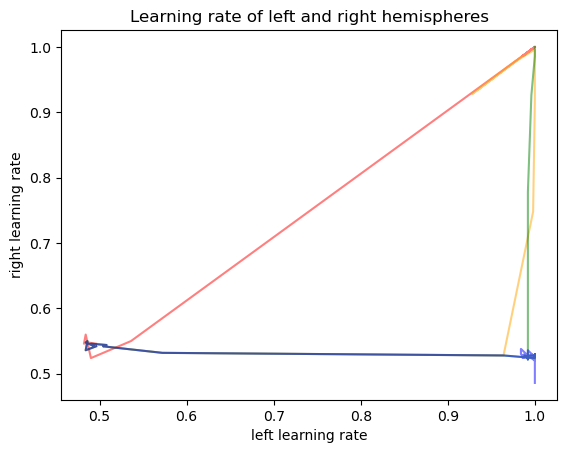

In [94]:
plt.plot(epoch_0_lr_left[i], epoch_0_lr_right[i], color='red', alpha=0.5)
plt.plot(epoch_10_lr_left[i], epoch_10_lr_right[i], color='orange', alpha=0.5)
plt.plot(epoch_20_lr_left[i], epoch_20_lr_right[i], color='green', alpha=0.5)
plt.plot(epoch_40_lr_left[i], epoch_40_lr_right[i], color='blue', alpha=0.5)
plt.xlabel('left learning rate')
plt.ylabel('right learning rate')
plt.title('Learning rate of left and right hemispheres')
plt.show()


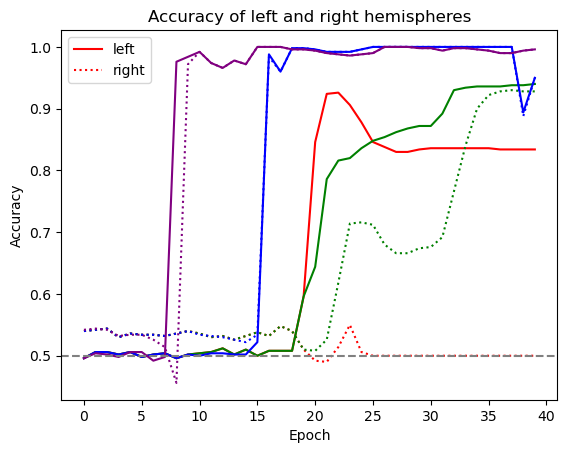

In [96]:
for i in [16]:

    plt.plot(epoch_40_lr_left[i], color='red', alpha=1,label='left')
    plt.plot(epoch_40_lr_right[i], ls=':', color='red', alpha=1,label='right')
    plt.plot(epoch_20_lr_left[i], color='green', alpha=1)
    plt.plot(epoch_20_lr_right[i], ls=':', color='green', alpha=1)
    plt.plot(epoch_10_lr_left[i], color='blue', alpha=1)
    plt.plot(epoch_10_lr_right[i], ls=':', color='blue', alpha=1)
    plt.plot(epoch_0_lr_left[i], color='purple', alpha=1)
    plt.plot(epoch_0_lr_right[i], ls=':', color='purple', alpha=1)


    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy of left and right hemispheres')
    plt.axhline(y=0.5, color='grey', linestyle='--')
    plt.legend()
    plt.savefig('figs/lr_learning_rate_plot.pdf')
    plt.show()